# 21BCE11373 (Abhishek Vidhate) Assignment-3

## 1. Download the dataset: Dataset

In [2]:
# i have downloaded the data and cleaned it , by removing empty value rows


## 2. Load the dataset into the tool.

In [6]:
import pandas as pd
df = pd.read_csv('penguins_cleaned.csv')


In [11]:
# display few rows 
df = pd.read_csv('penguins_cleaned.csv')  
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


## 3. Perform Below Visualizations:

In [19]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

numerical_cols = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
categorical_cols = ['species', 'island', 'sex']

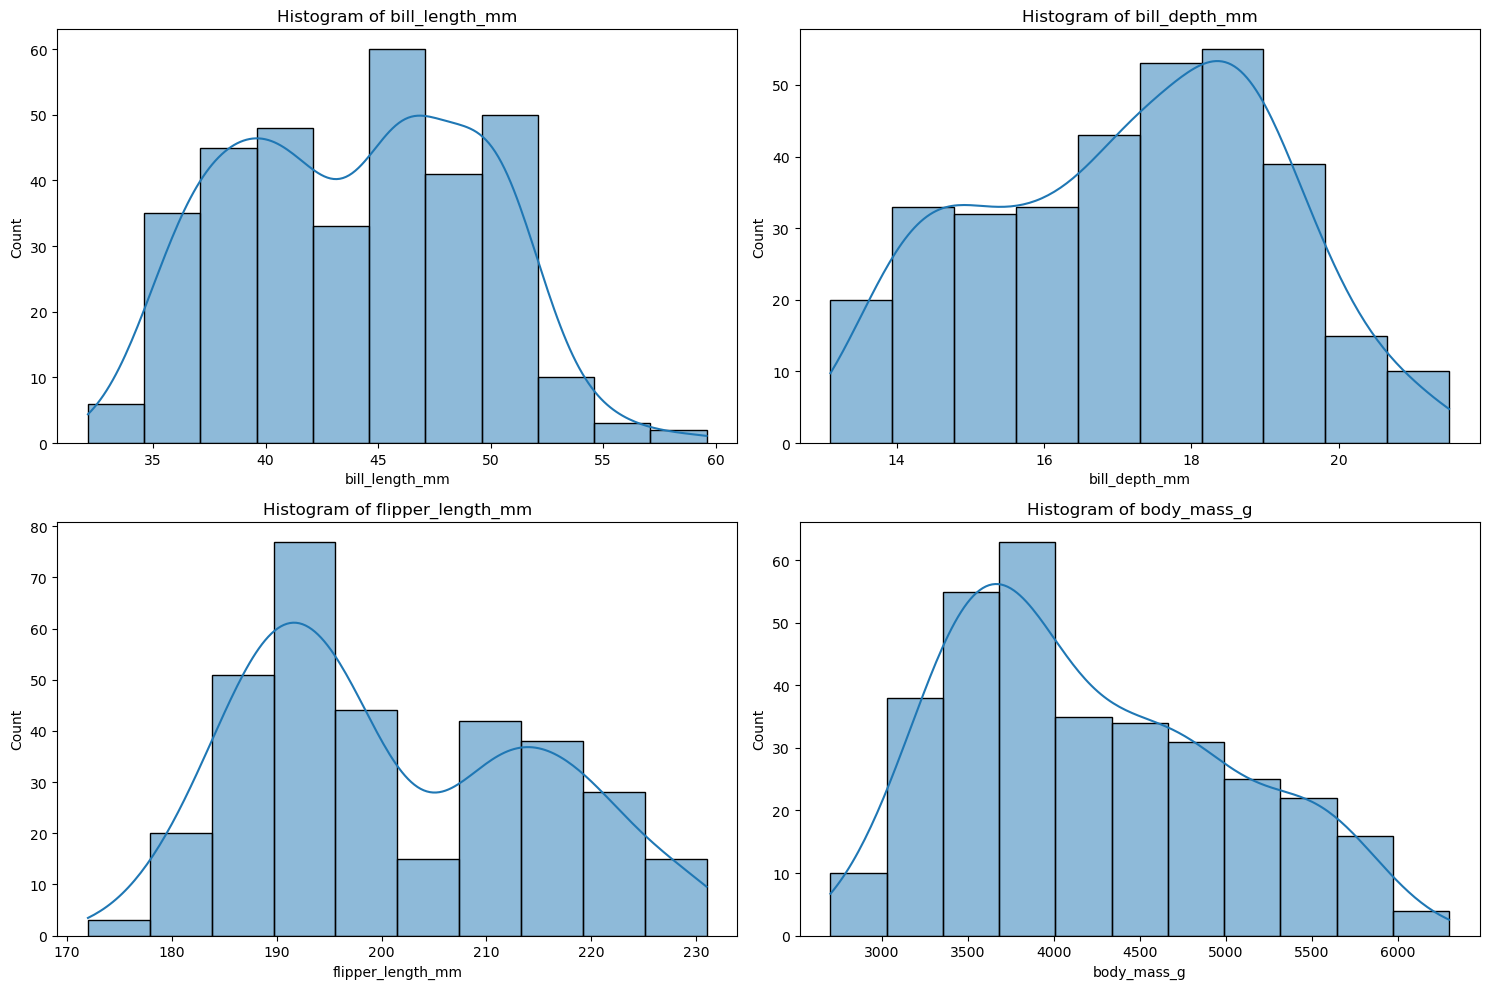

In [21]:
# Univariate Analysis - Histograms

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

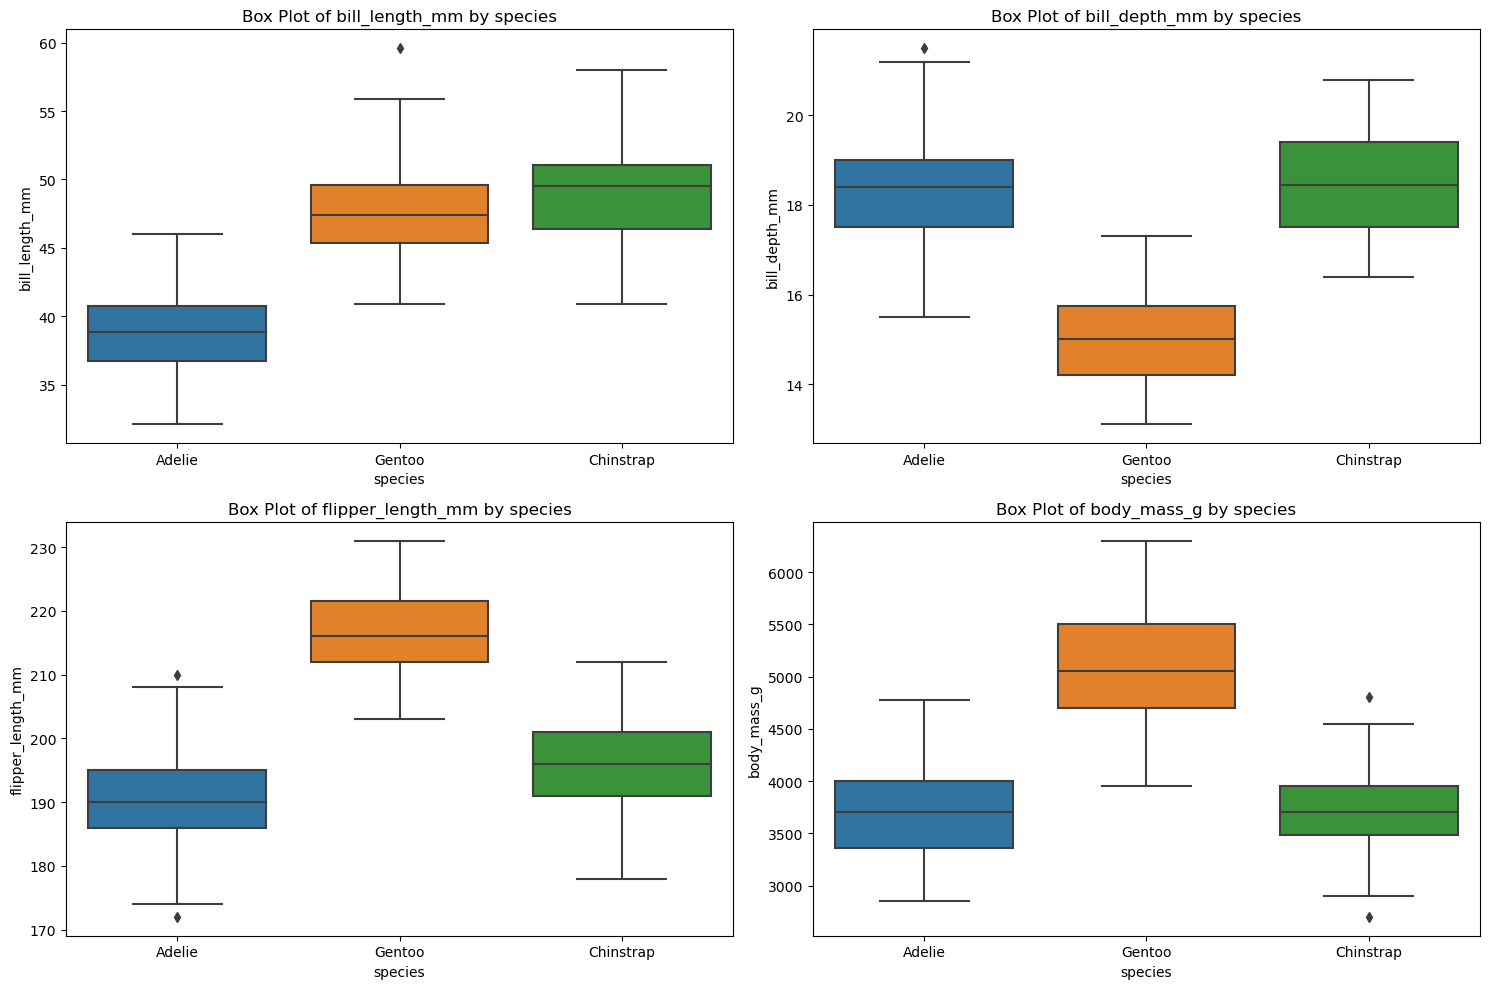

In [23]:
# Univariate Analysis - Box Plots

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Box Plot of {col} by species')
plt.tight_layout()
plt.show()


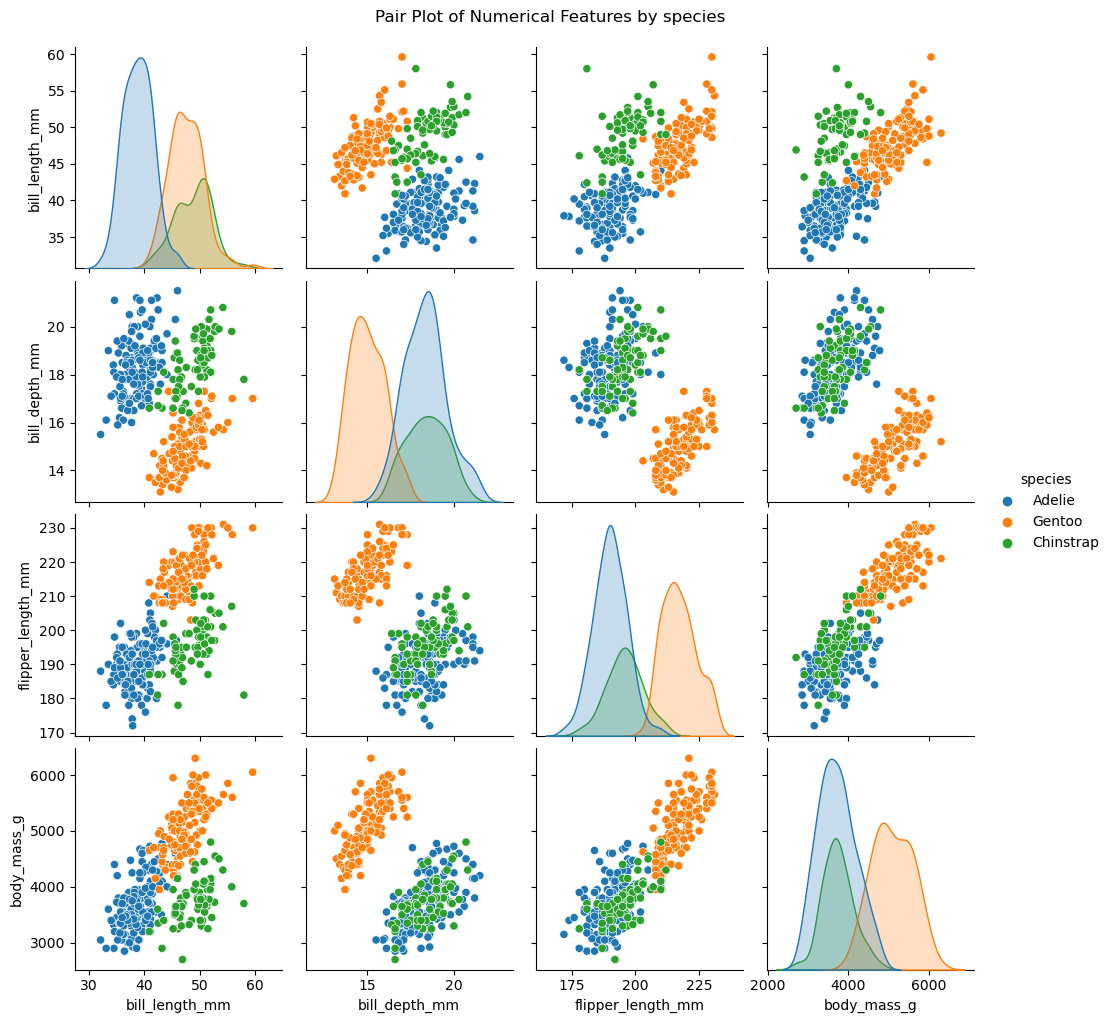

In [24]:
# Bivariate Analysis - Pair Plots

sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Features by species", y=1.02)
plt.show()

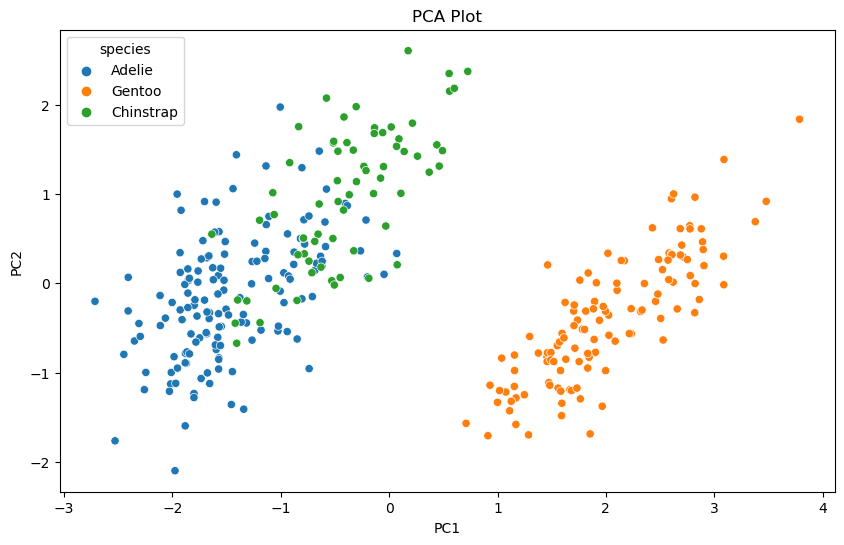

In [27]:
# Multi-Variate Analysis 

# PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df)
plt.title('PCA Plot')
plt.show()

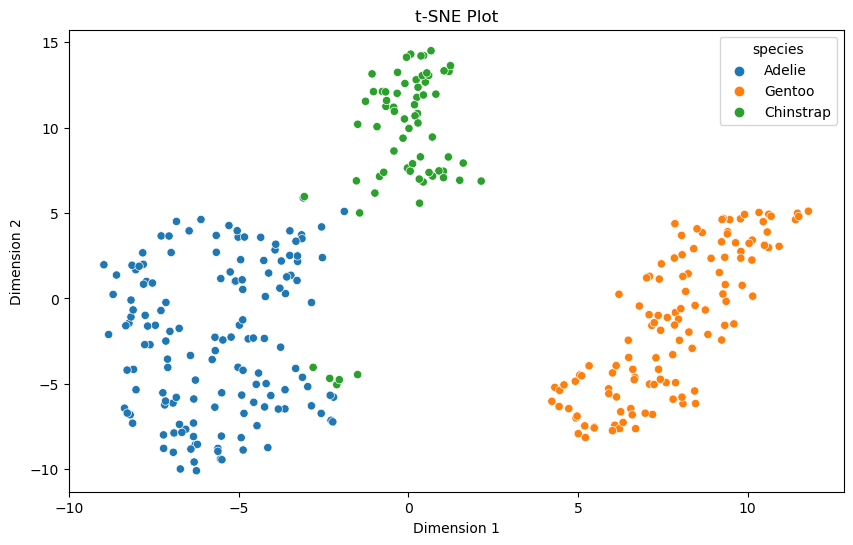

In [28]:
# t-SNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['species'] = df['species']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='species', data=tsne_df)
plt.title('t-SNE Plot')
plt.show()

## 4. Perform descriptive statistics on the dataset:

In [29]:
summary_stats = df.describe()

summary_stats

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


 ## 5. Check for Missing values and deal with them:

## i cleaned the data in task-1 of this assignment 
## in the data , i checked for missing values 
## then removed rows with missing data

In [30]:
# missing_values = df.isnull().sum()

# df.dropna(inplace=True)

 ## 6. Find the outliers and replace them:

In [32]:
import numpy as np

# A function fro detecting and treating outliers using IQR

def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned, outliers

# Detect and handle outliers for each numerical column
outliers_dict = {}
for col in numerical_cols:
    df, outliers = handle_outliers_iqr(df, col)
    outliers_dict[col] = outliers

# Display the outliers for each numerical column
for col, outliers in outliers_dict.items():
    print(f'Outliers in {col}:')
    display(outliers)


Outliers in bill_length_mm:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Outliers in bill_depth_mm:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Outliers in flipper_length_mm:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Outliers in body_mass_g:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


## 7. Check the correlation of independent variables with the target:

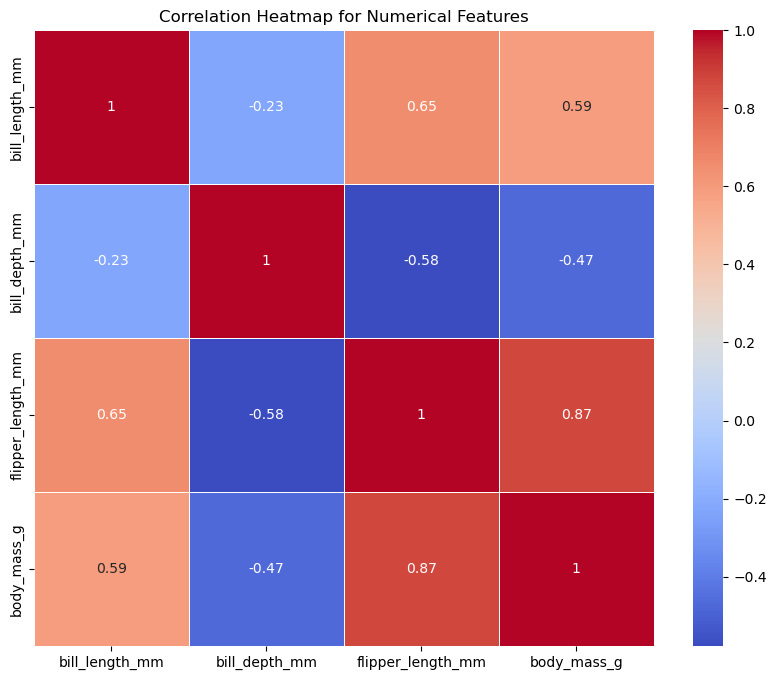

In [33]:
# correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()




In [34]:
# chi-squared test for category feature

from scipy.stats import chi2_contingency

categorical_cols = ['island', 'sex']

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['species'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {col} vs. species:')
    print(f'Chi-squared statistic: {chi2}')
    print(f'p-value: {p}')
    if p < 0.05:
        print('There is a significant association between', col, 'and Species.')
    else:
        print('There is no significant association between', col, 'and Species.')


Chi-squared test for island vs. species:
Chi-squared statistic: 284.5900126880923
p-value: 2.2818915409873682e-60
There is a significant association between island and Species.
Chi-squared test for sex vs. species:
Chi-squared statistic: 0.04860717014078319
p-value: 0.9759893689765846
There is no significant association between sex and Species.


## 8. Check for Categorical columns and perform encoding:

In [35]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)


## 9. Split the data into dependent and independent variables:

In [37]:
print(df_encoded.columns)


Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female',
       'sex_male'],
      dtype='object')


In [39]:
print(df_encoded.head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7                181         3750   
1            39.5           17.4                186         3800   
2            40.3           18.0                195         3250   
3            36.7           19.3                193         3450   
4            39.3           20.6                190         3650   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
3               1                  0               0              0   
4               1                  0               0              0   

   island_Dream  island_Torgersen  sex_female  sex_male  
0             0                 1           0         1  
1             0                 1           1   

In [40]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [46]:
# Identify the target column
target_column = 'species'

# Split the data into X (independent variables) and y (target variable)
X = df.drop(target_column, axis=1)
y = df[target_column]

 ## 10. Scaling the data:

In [50]:
from sklearn.preprocessing import StandardScaler

categorical_cols = ['island', 'sex']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)


## 11. Split the data into training and testing:

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


 ## 12. Check the training and testing data shape:

In [52]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (266, 9)
Testing data shape: (67, 9)
